<a href="https://colab.research.google.com/github/MartaPCastillo/Simulacion-II/blob/main/Portafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [28]:
tickers = ['MCD', 'AAPL', 'TSLA', 'DIS']
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2024,3,23)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2573 entries, 2014-01-02 to 2024-03-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MCD     2573 non-null   float64
 1   AAPL    2573 non-null   float64
 2   TSLA    2573 non-null   float64
 3   DIS     2573 non-null   float64
dtypes: float64(4)
memory usage: 100.5 KB


In [30]:
mydata.head()

,MCD,AAPL,TSLA,DIS
Date,,,,
2014-01-02,73.601601,17.273226,10.006667,69.964493
2014-01-03,73.700859,16.893808,9.970667,69.817719
2014-01-06,73.174088,16.985924,9.800000,69.551697
2014-01-07,73.578697,16.864452,9.957333,70.028709
2014-01-08,72.838181,16.971252,10.085333,69.001305


In [31]:
mydata.tail()

,MCD,AAPL,TSLA,DIS
Date,,,,
2024-03-18,278.579987,173.484695,173.800003,113.849998
2024-03-19,282.869995,175.841492,171.320007,114.510002
2024-03-20,284.450012,178.427994,175.660004,116.459999
2024-03-21,283.529999,171.137878,172.820007,116.699997
2024-03-22,282.630005,172.046646,170.830002,115.870003


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [32]:
mydata.iloc[0]

MCD     73.601601
AAPL    17.273226
TSLA    10.006667
DIS     69.964493
Name: 2014-01-02 00:00:00, dtype: float64

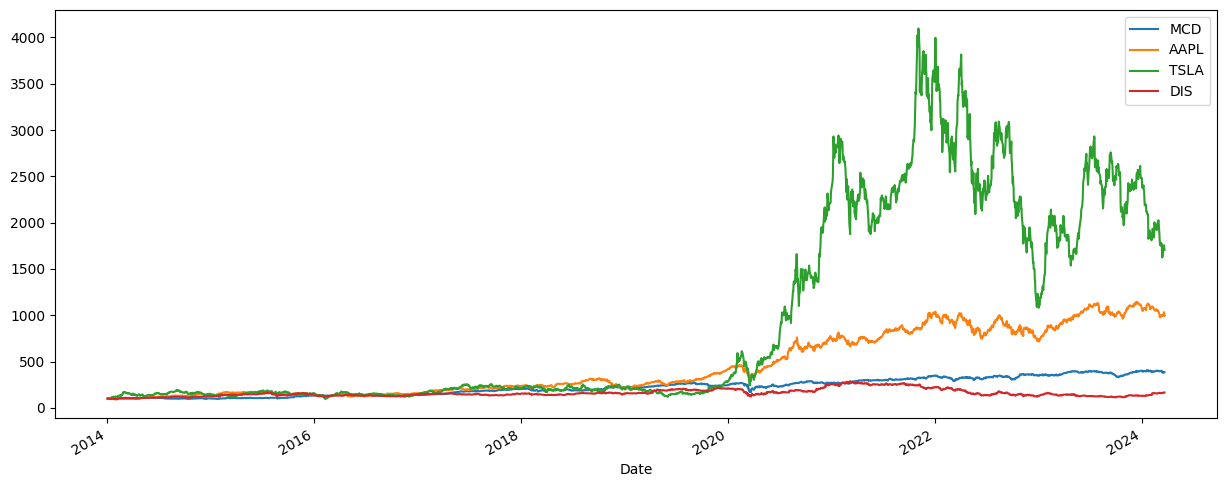

In [33]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

###Notas
La gráfica de arriba muestra los precios normalizados (porcentual).
Esta gráfica es más útil ya que nos muestra realmente qué empresa tiene mayor creciemiento.
También podemos observar ciertas tendencias, como en el 2008, alrededor del 2008, que todas tuvieron una caída, esto debido a los acontecimientos de Estados Unidos, de la famosa burbuja.
Además se pueden observar los cruces y alzas que llegan a tener.

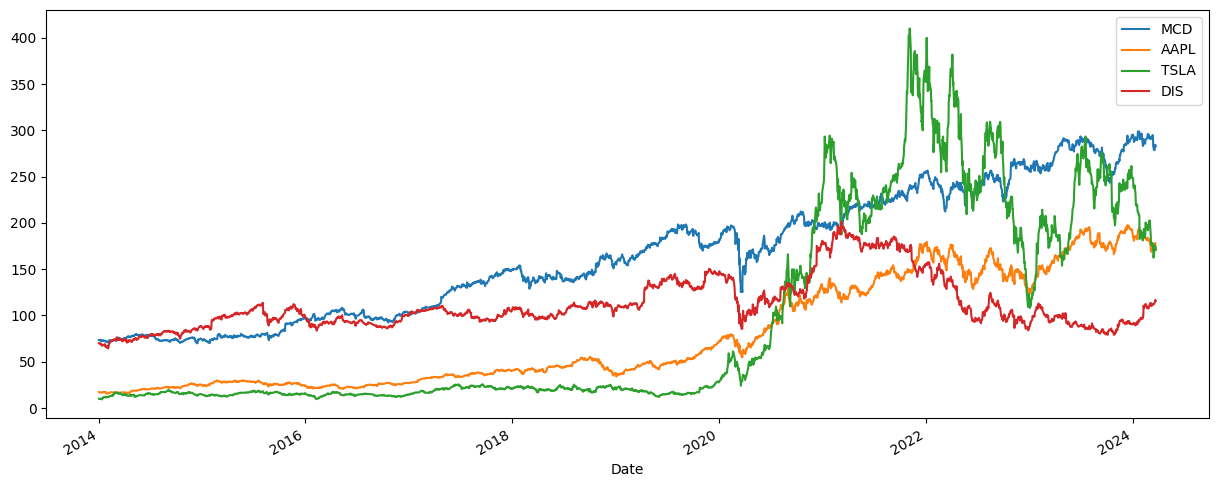

In [34]:
mydata.plot(figsize=(15,6))
plt.show()

###Notas
La gráfica de arriba muestra los precios de las empresas.
Esta gráfica no es tan útil ya que no nos muestra que empresa es la que en realidad está creciendo más, únicamante nos dice cuanto se gana con sus acciones pero esa información no nos dice mucho.

In [35]:
mydata.loc['2014-1-03']

MCD     73.700859
AAPL    16.893808
TSLA     9.970667
DIS     69.817719
Name: 2014-01-03 00:00:00, dtype: float64

In [36]:
mydata.iloc[0]

MCD     73.601601
AAPL    17.273226
TSLA    10.006667
DIS     69.964493
Name: 2014-01-02 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [37]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,MCD,AAPL,TSLA,DIS
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,0.001349,-0.021966,-0.003598,-0.002098
2014-01-06,-0.007147,0.005453,-0.017117,-0.003810
2014-01-07,0.005529,-0.007151,0.016054,0.006858
2014-01-08,-0.010064,0.006333,0.012855,-0.014671


In [38]:
weights = np.array([0.25, 0.25, 0.25, 0.25])#Se les da pesos iguales a cada empresa

In [39]:
weights

array([0.25, 0.25, 0.25, 0.25])

In [40]:
np.dot(returns,weights)

array([        nan, -0.00657813, -0.00565548, ...,  0.01566417,
       -0.01454966, -0.0041228 ])

In [41]:
annual_returns= returns.mean()*250
annual_returns

MCD     0.150541
AAPL    0.263104
TSLA    0.428379
DIS     0.085900
dtype: float64

In [42]:
np.dot(annual_returns, weights) #Hace la suma de las multiplicaciones de los retornos por los pesos

0.23198104646343645

In [47]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%'
print(pfolio_1)

23.198%


In [63]:
weights_2= np.array([0.15, 0.00, 0.85, 0.00]) #Asignar pesos de acuerdo a que empresa nos conivene más para obtener el mayor rendimiento

In [64]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%'
print(pfolio_1)
print(pfolio_2)

23.198%
38.67%
